# Importing Requires Libraries

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/DataSets/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory Data Analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

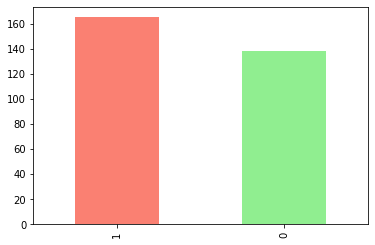

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightgreen"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


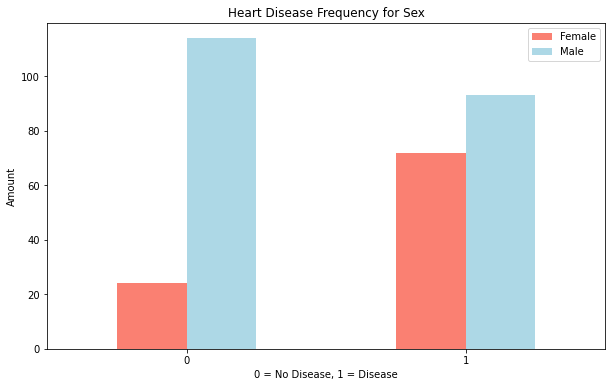

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

A women has more chances of getting a heart disease than a man according to this data

In [ ]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

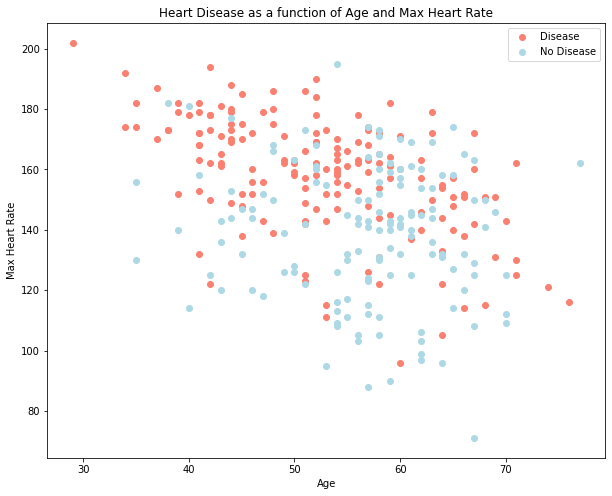

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

As People get Older the Max Heart Rate decreases

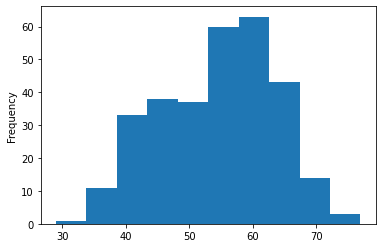

In [ ]:
df.age.plot.hist();

Most of the people lie in the range 50 - 65 years of age

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


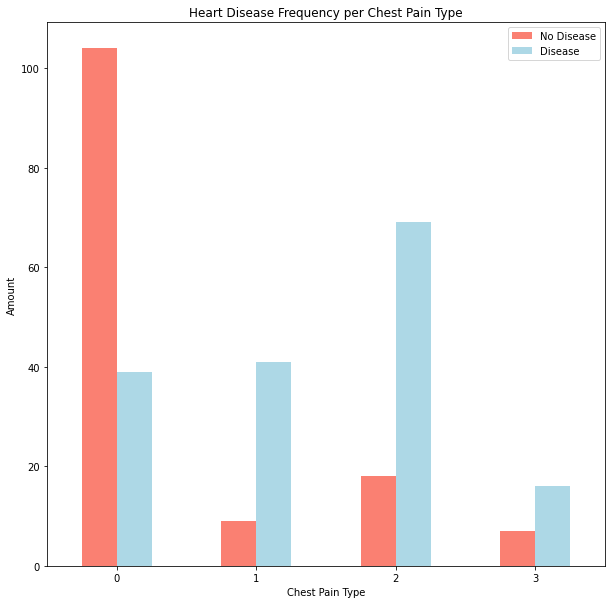

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 10),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

People having Chest Pain Type of 2 have more Chances of a Heart Disease than any other pain type

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


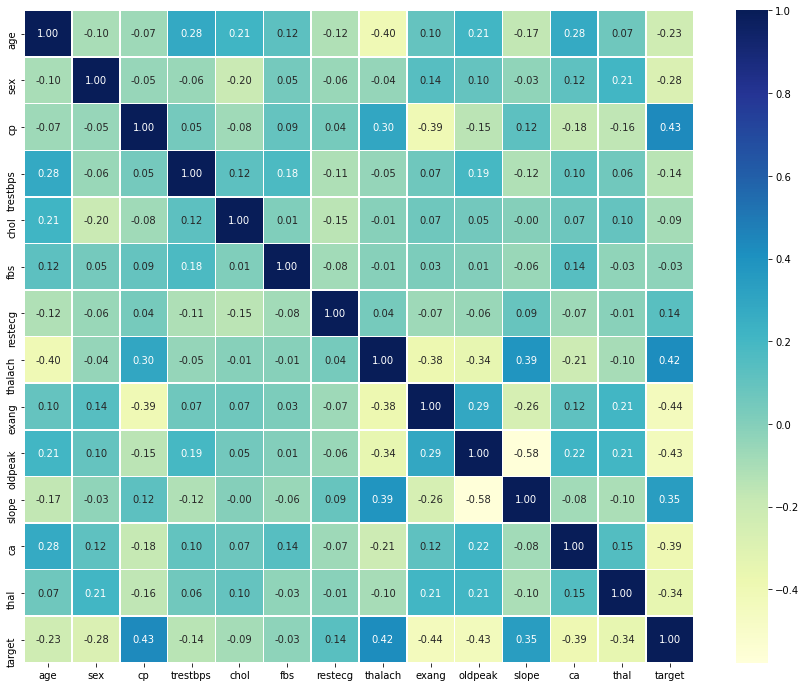

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

* Thalach, CP, Slope - Have high postive correlation with target variable
* Thal, CA, OldPeak, Exang - Have high negative correlation with target variable
* Slope and Thalace have a significant Correlation value between them

# Modelling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = df.drop("target", axis=1)
y = df["target"]

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
x = x.drop(["trestbps", "chol", "fbs", "restecg", "slope"], axis=1)
x.head()

,age,sex,cp,thalach,exang,oldpeak,ca,thal
0,63,1,3,150,0,2.3,0,1
1,37,1,2,187,0,3.5,0,2
2,41,0,1,172,0,1.4,0,2
3,56,1,1,178,0,0.8,0,2
4,57,0,0,163,1,0.6,0,2


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
np.random.seed(99)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.head(), len(x_train)

(     age  sex  cp  thalach  exang  oldpeak  ca  thal
 103   42    1   2      194      0      0.8   0     3
 136   60    0   2       96      0      0.0   0     2
 164   38    1   2      173      0      0.0   4     2
 141   43    1   0      181      0      1.2   0     2
 124   39    0   2      179      0      0.0   0     2, 242)

In [ ]:
y_train.head(), len(y_train)

(103    1
 136    1
 164    1
 141    1
 124    1
 Name: target, dtype: int64, 242)

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):

    np.random.seed(99)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8688524590163934}

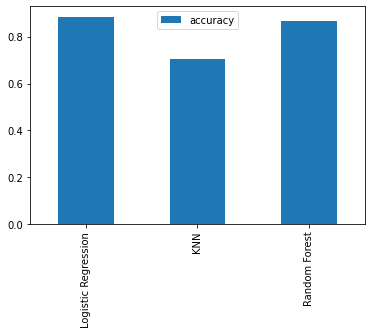

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

What else should we do to gurantee a CLASSIFICATION model's correctness and further improve it?

* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

## Tuning KNN

In [ ]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7933884297520661,
 0.743801652892562,
 0.7603305785123967,
 0.7396694214876033,
 0.7355371900826446,
 0.731404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.6900826446280992,
 0.7024793388429752,
 0.7107438016528925,
 0.7024793388429752,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644]

In [ ]:
test_scores

[0.639344262295082,
 0.5737704918032787,
 0.7049180327868853,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.5901639344262295]

Maximum KNN score on the test data: 70.49%


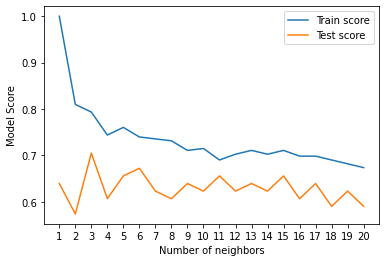

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

## Tuning LogisticRegression and RandomForestClassifier with RandomizedSearchCV

In [ ]:
# Parameter Grid For Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 10, 20),
                "solver": ["liblinear"]}

# Parameter Grid For RandomForest
rf_grid = {"n_estimators": np.arange(10, 1600, 90),
           "max_depth": [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           "min_samples_split": np.arange(1, 22, 2),
           "min_samples_leaf": np.arange(1, 22, 2)}

In [ ]:
# Tuning LogisticRegression
np.random.seed(99)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=50,
                                verbose=True)

rs_log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C':...
       8.85866790e-02, 4.83293024e-01, 2.63665090e+00, 1.43844989e+01,
       7.84759970e+01, 4.28133240e+02, 2.33572147e+03, 1.27427499e+04,
       6.95192796e+04, 3.79269019e+05, 2.06913808e+06, 1.12883789e+07,
       6.15848211e+0

In [ ]:
rs_log_reg.best_params_

{'C': 428.1332398719387, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [ ]:
# Tuning RandomForestClassifier
np.random.seed(99)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50,
                           verbose=True)

rs_rf.fit(x_train, y_train)

In [ ]:
rs_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 460}

In [ ]:
rs_rf.score(x_test, y_test)

0.8852459016393442

## Tuning Models with GridSearchCV

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [ ]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(x_test, y_test)

0.8524590163934426

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)

gs_rf.fit(x_train, y_train);

# Evaluation 

In [ ]:
y_preds = rs_rf.predict(x_test)

In [ ]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_test

137    1
262    0
43     1
90     1
32     1
      ..
264    0
40     1
214    0
183    0
6      1
Name: target, Length: 61, dtype: int64

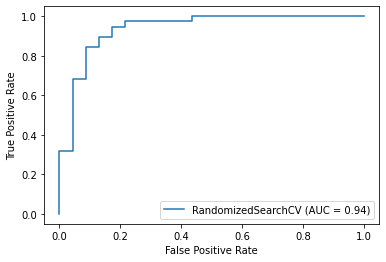

In [ ]:
#plot ROC curve and caluclate AUC metric

plot_roc_curve(rs_rf, x_test, y_test)

In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20  3]
 [ 4 34]]


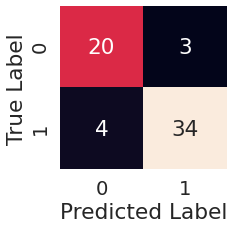

In [ ]:
sns.set(font_scale=1.8)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.92      0.89      0.91        38

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* Recall - No false Negative => Recall=1
* Precision - No False Positive => Precision=1

Classification Report after performing Cross Validation -

In [ ]:
rs_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 460}

In [ ]:

rf_clf = RandomForestClassifier(n_estimators=460,
                                max_depth=9,
                                min_samples_split=5,
                                min_samples_leaf=3)


In [ ]:
cv_acc = cross_val_score(rf_clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.80327869, 0.85245902, 0.81967213, 0.81666667, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8084153005464481

In [ ]:
cv_precision = cross_val_score(rf_clf, x, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8195312255683772

In [ ]:
cv_recall = cross_val_score(rf_clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8606060606060606

In [ ]:
cv_f1 = cross_val_score(rf_clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8384357180230755

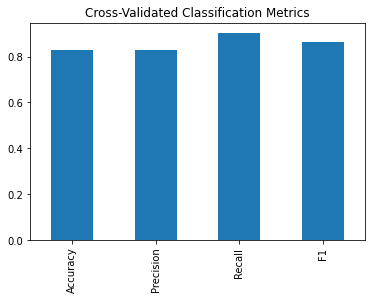

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics", legend=False);

# Feature Importance

In [ ]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=460,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_clf.feature_importances_

array([0.1092121 , 0.04722568, 0.19821807, 0.15421365, 0.07691996,
       0.13234191, 0.14634967, 0.13551895])

In [ ]:
feature_dict = dict(zip(df.columns, list(rf_clf.feature_importances_)))
feature_dict

{'age': 0.10921210424696817,
 'chol': 0.07691996234510447,
 'cp': 0.19821806776089582,
 'fbs': 0.1323419133709119,
 'restecg': 0.14634967331567836,
 'sex': 0.0472256827464486,
 'thalach': 0.13551894627517852,
 'trestbps': 0.15421364993881417}

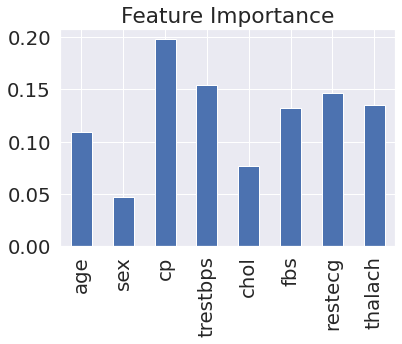

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(rf_clf, 'heart_disease.mdl')

['heart_disease.mdl']